# Przetwarzanie Grafiki i Muzyki - laboratorium nr 5

# Zadanie 1 (2 punkty)

Proszę narysować histogramy dla obrazków "LENA_512.jpg" oraz "Statek_640_505.jpg":

  * Narysuj histogram oddzielnie dla R, G, B
  * Narysuj histogram dla szarego zdjęcia

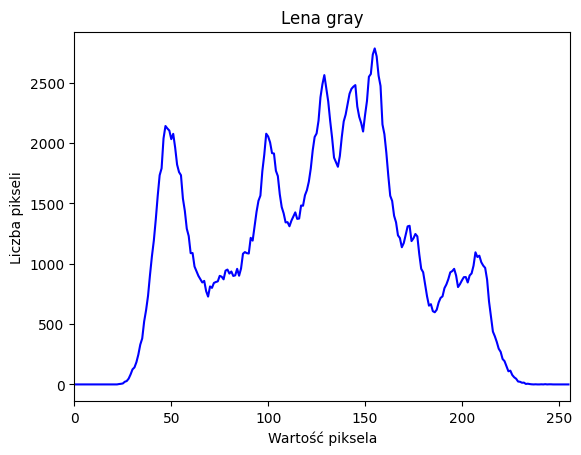

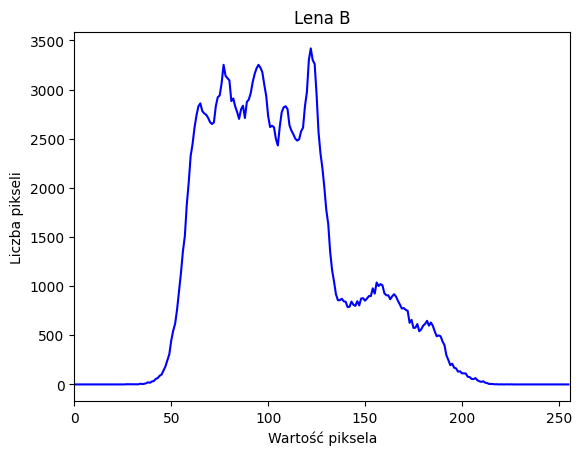

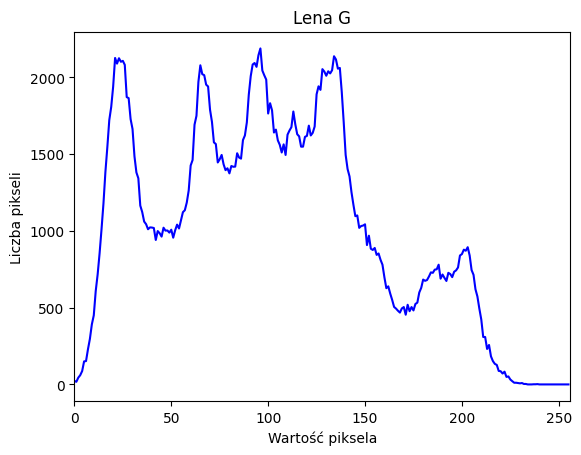

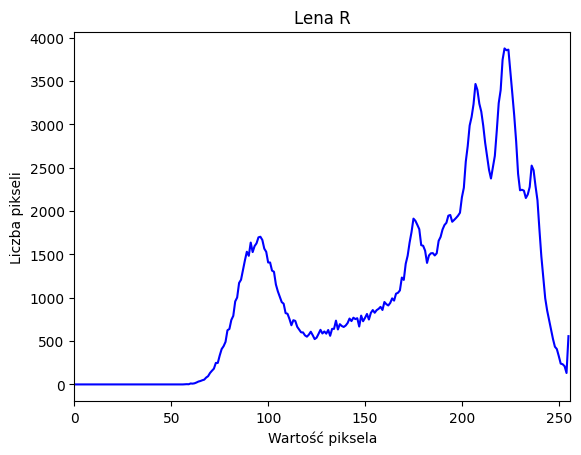

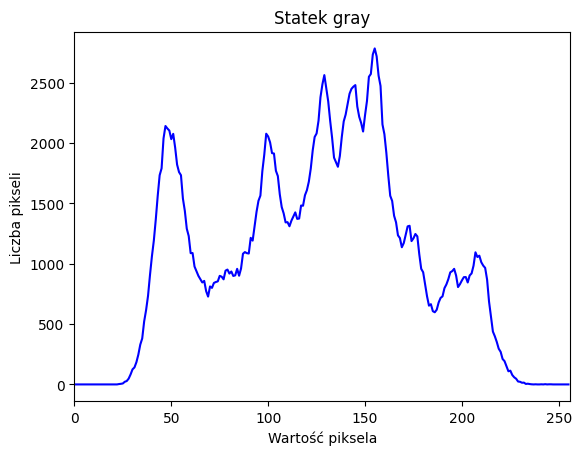

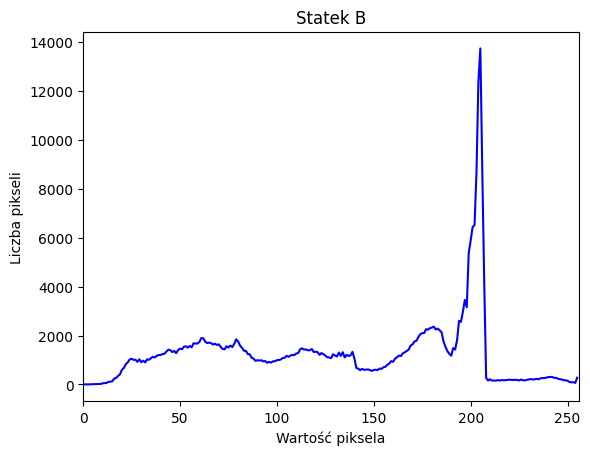

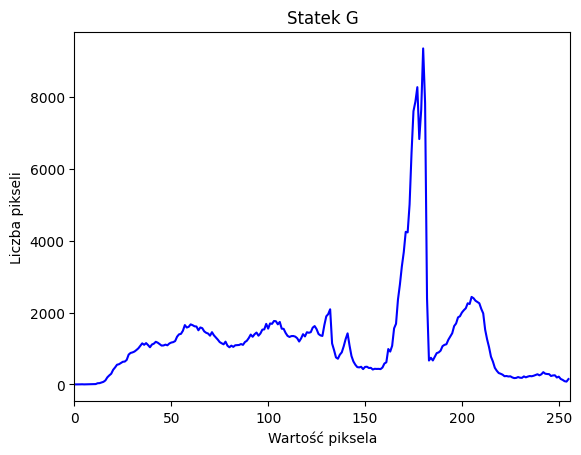

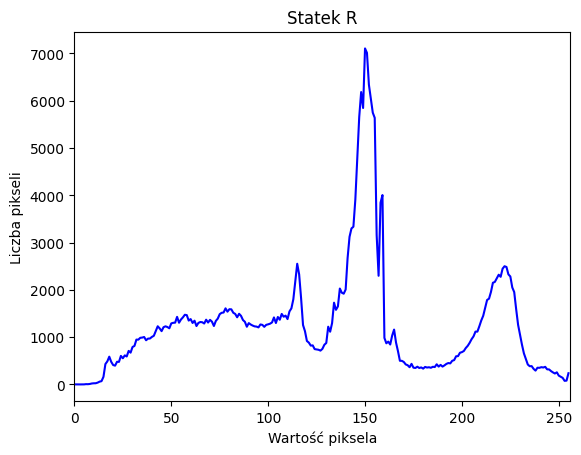

In [22]:
import os

import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def draw_histogram(img, title):
    histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(histogram, color='blue')
    plt.title(title)
    plt.xlabel('Wartość piksela')
    plt.ylabel('Liczba pikseli')
    plt.xlim([0, 256])
    plt.show()

lena_gray = cv2.imread('./img/LENA_512.jpg', cv2.IMREAD_GRAYSCALE)
draw_histogram(lena_gray, 'Lena gray')
lena_rgb = cv2.imread('./img/LENA_512.jpg')
b, g, r = cv2.split(lena_rgb)
draw_histogram(b, 'Lena B')
draw_histogram(g, 'Lena G')
draw_histogram(r, 'Lena R')

boat_gray = cv2.imread('./img/statek_640_505.jpg', cv2.IMREAD_GRAYSCALE)
draw_histogram(lena_gray, 'Statek gray')
boat_rgb = cv2.imread('./img/statek_640_505.jpg')
b, g, r = cv2.split(boat_rgb)
draw_histogram(b, 'Statek B')
draw_histogram(g, 'Statek G')
draw_histogram(r, 'Statek R')

# Zadanie 2 (2 punkty)

Proszę zaimplementować funkcję zmiany kontrastu obrazu.

Wykorzystaj tablicę LUT:

$$
LUT(i) = \left\{ \begin{array}{ll}
0 & \textrm{gdy } a \left(i - \frac{i_{max}}{2} \right)+\frac{i_{max}}{2}<0\\
a \left(i - \frac{i_{max}}{2} \right)+ \frac{i_{max}}{2} & \textrm{gdy } 0 \leq a \left( i - \frac{i_{max}}{2} \right) + \frac{i_{max}}{2} \leq i_{max} \\
i_{max} & \textrm{gdy } a \left( i - \frac{i_{max}}{2} \right)+ \frac{i_{max}}{2}>i_{max} 
\end{array} \right.
$$


Parametr
  * $a<1$ - zmniejszenie kontrastu,
  * $a=1$ - identyczność,
  * $a>1$ - zwiększenie kontrastu.

Uwagi:

  * Proszę zastosować napisaną funkcję do zdjęcia "LENA_512.jpg" i wykonać ją na luminancji (składowa Y z formatu YCbCr) dla $a\in\{0.5, 1, 1.5\}$, a następnie wyświetlić w formacie RGB z uwzględnieniem kanałów Cb i Cr (po zrobieniu konwersji z YCbCr na RGB).
  * Porównaj histogramy przed i po ściemnieniu.

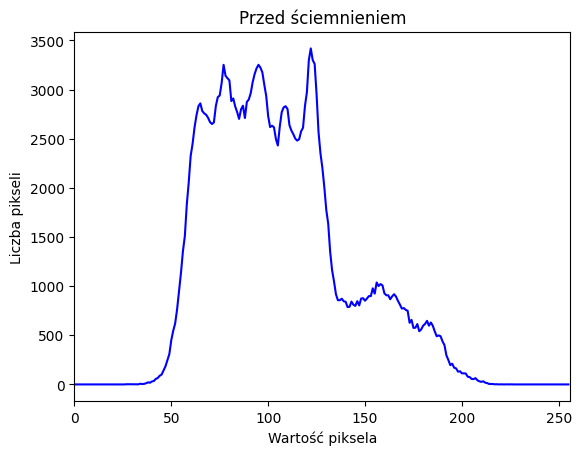

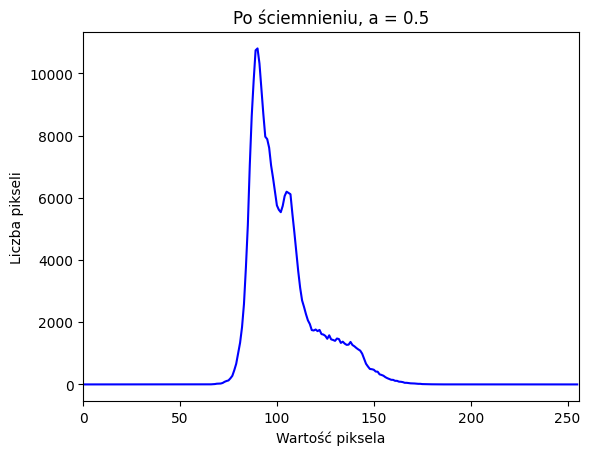

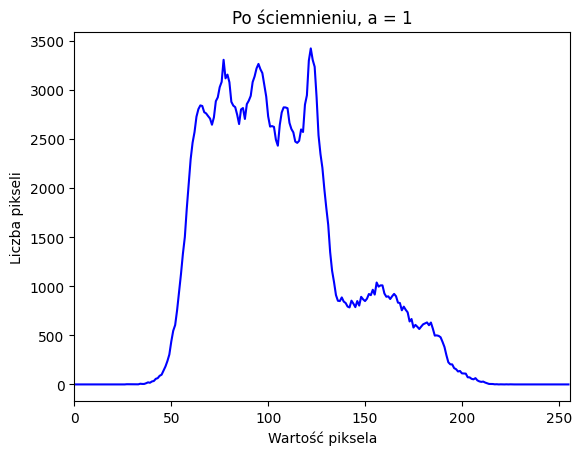

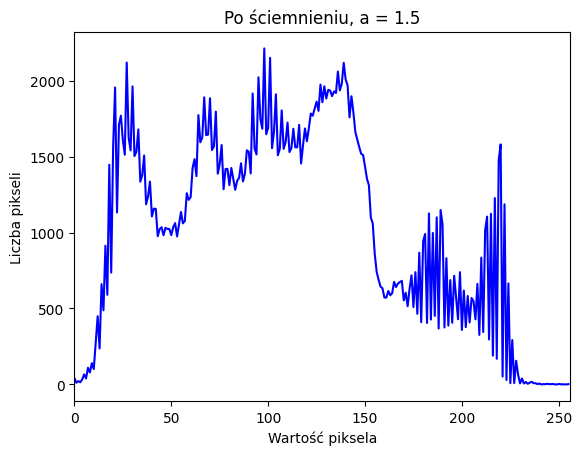

In [2]:
def contrast_adjustment(image, a):
    imax = np.max(image)
    lut = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        val = int(a * (i - imax / 2) + imax / 2)
        if val < 0:
            lut[i] = 0
        elif val > imax:
            lut[i] = imax
        else:
            lut[i] = val
    adjusted_image = cv2.LUT(image, lut)
    return adjusted_image

def display_image(img):
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

img = cv2.imread('./img/LENA_512.jpg')
a_values = [0.5, 1, 1.5]
draw_histogram(img, 'Przed ściemnieniem')
for a in a_values:
    ycbcr_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    y_channel = ycbcr_img[:, :, 0]
    adjusted_y_channel = contrast_adjustment(y_channel, a)
    ycbcr_img[:, :, 0] = adjusted_y_channel
    new_img = cv2.cvtColor(ycbcr_img, cv2.COLOR_YCrCb2BGR)
    display_image(new_img)
    draw_histogram(new_img, f'Po ściemnieniu, a = {a}')


## Rozciągnięcie histogramu

## Zadanie 3 (2 punkty)

Proszę zaimplementować funkcję rozciągającą histogram.

Wykorzystaj tablicę LUT:

$$ 
LUT(i)= \frac{i_{max} }{ {v_{max} - v_{min}} } \cdot (i - v_{min})
$$

Parametr:

  * $v_{max}$ oznacza maksymalną wartość składowej w obrazie,
  * $v_{min}$ oznacza minimalną wartość składowej w obrazie,
  * $i_{max}$ oznacza maksymalną możliwą wartość składowej w obrazie.

Uwagi:

  * Proszę zastosować do zdjęcia LENA_512. Proszę wykonać na Luminancji (składowa Y z formatu YCbCr) a następnie wyświetlić w formacie RGB z uwzględnieniem kanałów Cb i Cr.
  * Porównaj histogramy przed i po wyrównaniu.



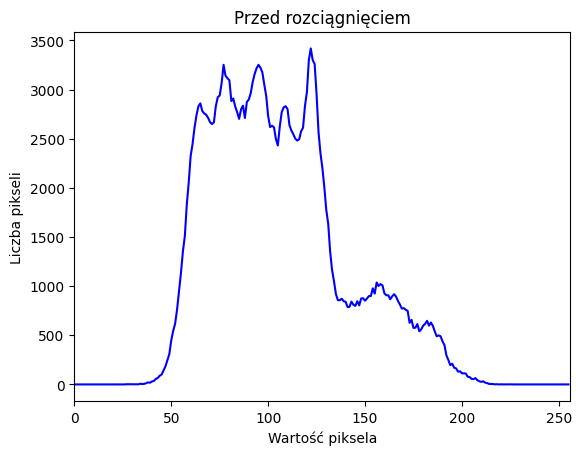

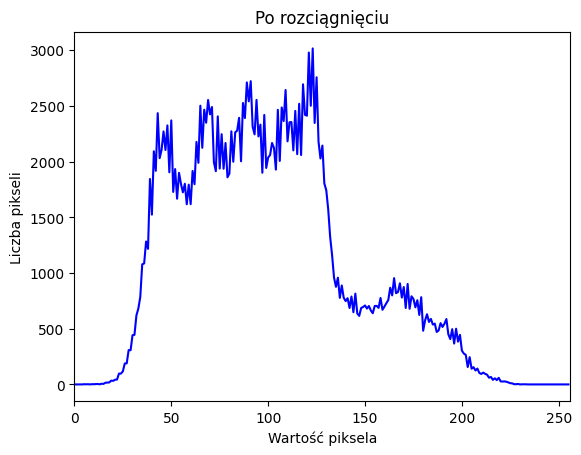

In [3]:
def stretch_histogram(image):
    v_min = np.min(image)
    v_max = np.max(image)
    i_max = 255 

    lut = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        lut[i] = ((i_max / (v_max - v_min)) * (i - v_min)).astype(np.uint8)
    stretched_image = cv2.LUT(image, lut)
    return stretched_image

img = cv2.imread('./img/LENA_512.jpg')
display_image(img)
draw_histogram(img, 'Przed rozciągnięciem')

ycbcr_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
y_channel = ycbcr_img[:, :, 0]
adjusted_y_channel = stretch_histogram(y_channel)
ycbcr_img[:, :, 0] = adjusted_y_channel
new_img = cv2.cvtColor(ycbcr_img, cv2.COLOR_YCrCb2BGR)
display_image(new_img)
draw_histogram(new_img, f'Po rozciągnięciu')

## Wyrównywanie histogramu

## Zadanie 4 (2 punkty) 

Proszę zaimplementować funkcję wyrównującą histogram.

  * Najpierw stwórz dystrybuantę:

$$
D(n)= \frac{h_0+h_1+ \ldots +h_n }{sum}
$$

gdzie:

$h_n$ - to ilość punktów na obrazie o n-tym poziomie szarości,

$sum$ - to liczba wszystkich punktów obrazu
  
  *  Wykorzystaj tablicę LUT:
$$ 
LUT(i) = \frac{D(i)-D_0}{1-D_0} \cdot (k-1)
$$
				
Parametr

$D_0$ - to pierwsza niezerowa wartość dystrybuanty obrazu źródłowego,

$k$ - to liczba możliwych wartości jasności obrazu (zwykle 256).

Uwagi:

  * Proszę zastosować do zdjęcia LENA_512. Proszę wykonać na Luminancji (składowa Y z formatu YCbCr), a następnie wyświetlić w formacie RGB z uwzględnieniem kanałów Cb i Cr.
  * PORÓWNAJ HISTOGRAMY PRZED I PO WYRÓWNANIU.

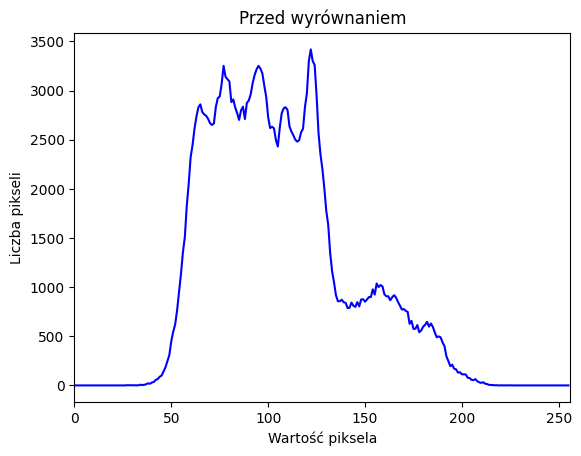

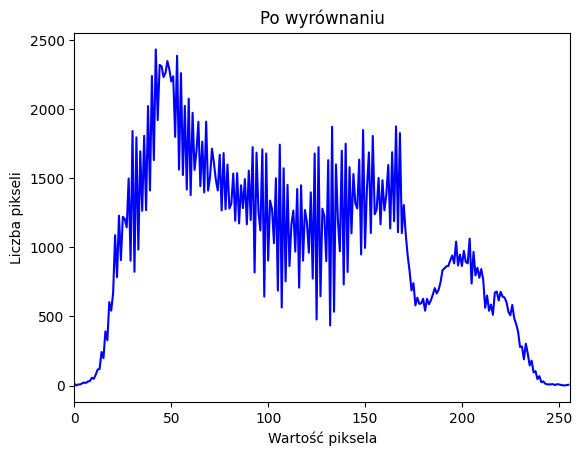

In [4]:

def get_df(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    sum_all_points = hist.sum()
    cdf = hist.cumsum() / sum_all_points
    return cdf
    

def histogram_equalization(img):
    k = 256
    cdf = get_df(img)
    d0_index = np.nonzero(cdf)[0][0]
    lut = (((cdf - cdf[d0_index]) / (1 - cdf[d0_index])) * (k - 1)).astype(np.uint8)
    res = cv2.LUT(img, lut)
    return res

img = cv2.imread('./img/LENA_512.jpg')
display_image(img)
draw_histogram(img, 'Przed wyrównaniem')

ycbcr_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
y_channel = ycbcr_img[:, :, 0]
adjusted_y_channel = histogram_equalization(y_channel)
ycbcr_img[:, :, 0] = adjusted_y_channel
new_img = cv2.cvtColor(ycbcr_img, cv2.COLOR_YCrCb2BGR)
display_image(new_img)
draw_histogram(new_img, f'Po wyrównaniu')

# Zadanie 5 (2 punkty)

Proszę zastosować do zdjęcia "kobieta.jpg":

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/kobieta.jpg)

  * Rozciągnięcie histogramu
  * Wyrównywanie histogramu

Uwagi:

  * Przed wykonaniem powyższych operacji narysuj histogram i usuń piki odpowiadające wartością skrajnym (tak by móc rozciągnąć histogram)
  * Proszę wykonać na zdjęciu w odcieniach szarości i RGB. 


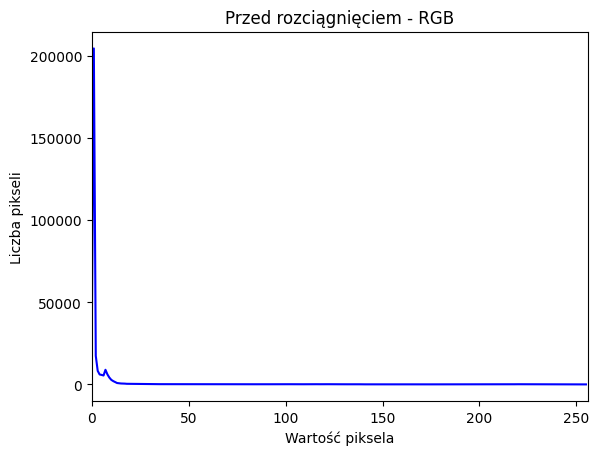

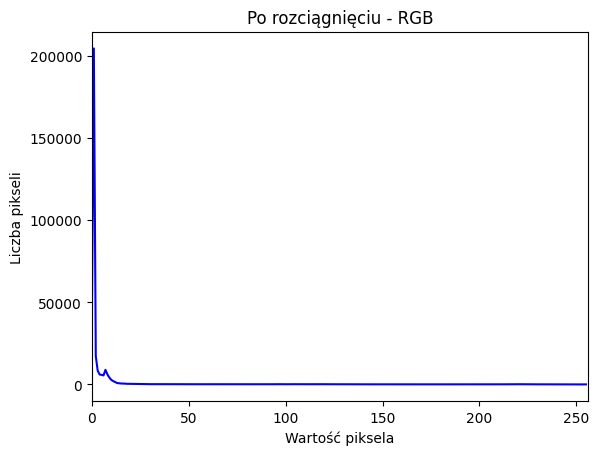

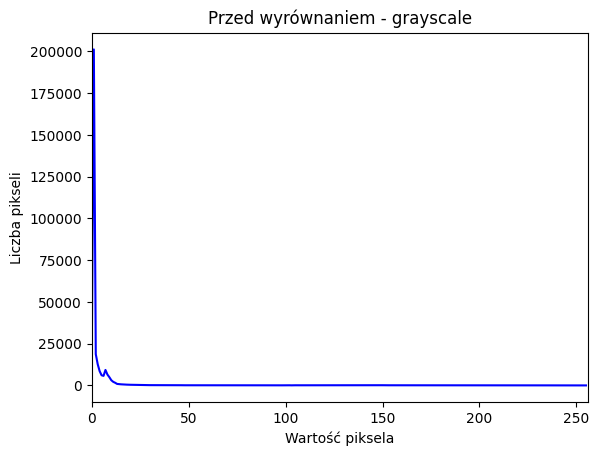

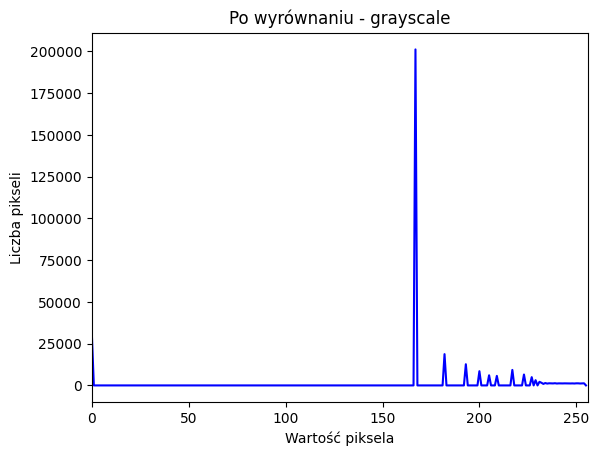

In [23]:
# można zignorować usuwanie pików
img = cv2.imread('./img/kobieta.jpg')
img_gray = cv2.imread('./img/kobieta.jpg', cv2.IMREAD_GRAYSCALE)

draw_histogram(img, 'Przed rozciągnięciem - RGB')

ycbcr_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
y_channel = ycbcr_img[:, :, 0]
adjusted_y_channel = stretch_histogram(y_channel)
ycbcr_img[:, :, 0] = adjusted_y_channel
new_img = cv2.cvtColor(ycbcr_img, cv2.COLOR_YCrCb2BGR)
display_image(new_img)
draw_histogram(new_img, f'Po rozciągnięciu - RGB')

draw_histogram(img_gray, 'Przed wyrównaniem - grayscale')
new_img = histogram_equalization(img_gray)
display_image(new_img)
draw_histogram(new_img, f'Po wyrównaniu - grayscale')


